# OLS Library Encoding Analysis Notebook

**Authorship:**
Adam Klie, *09/28/2021*
***
**Description:**
Notebook to explore the feature encodings we have come up with so far for this project
***
**TODOs:**
 - <font color='green'> Done TODO </font>
 - <font color='orange'> WIP TODO </font>
 - <font color='red'> Queued TODO </font>
***

In [40]:
FEATURES = "mixed-1.0"  # What features to use to train the model
PREPROCESS = "0.18-0.4"  # Preprocessing steps, separated by "-"
TEST = False

## Set-up

In [12]:
# The classics
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# EDA
from pandas_profiling import ProfileReport

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

## Load data

In [41]:
X = np.loadtxt('{0}/X_{1}_{2}.txt'.format(FEATURES.replace("-", "_"), FEATURES, PREPROCESS), delimiter=' ', dtype=float)
y = np.loadtxt('y_binary_{}.txt'.format(PREPROCESS), delimiter=' ', dtype=int)
X.shape, y.shape

((302936, 21), (302936,))

In [42]:
# Check an example
X[0], y[0]

(array([12. ,  0. ,  0. ,  0.9,  2. ,  1. ,  1. ,  0.6,  7. ,  1. ,  1. ,
         0.4,  5. ,  0. ,  0. ,  0.3,  0. ,  0. ,  1. ,  0.5,  1. ]),
 1)

In [43]:
if TEST:
    num = int(len(X)/10)
    X, y = X[:num, :], y[:num]
X.shape, y.shape

((302936, 21), (302936,))

In [61]:
df = pd.DataFrame(np.concatenate([X,y.reshape(len(y), 1)], axis=1))

In [62]:
header = [
    "L1_length",
    "TFBS1_type",
    "TFBS1_orient",
    "TFBS1_affinity",
    "L2_length",
    "TFBS2_type",
    "TFBS2_orient",
    "TFBS2_affinity",
    "L3_length",
    "TFBS3_type",
    "TFBS3_orient",
    "TFBS3_affinity",
    "L4_length",
    "TFBS4_type",
    "TFBS4_orient",
    "TFBS4_affinity",
    "L5_length",
    "TFBS5_type",
    "TFBS5_orient",
    "TFBS5_affinity",
    "L6_length",
    "Response"
]

In [63]:
df.columns = header

In [64]:
df.head()

,L1_length,TFBS1_type,TFBS1_orient,TFBS1_affinity,L2_length,TFBS2_type,TFBS2_orient,TFBS2_affinity,L3_length,TFBS3_type,TFBS3_orient,TFBS3_affinity,L4_length,TFBS4_type,TFBS4_orient,TFBS4_affinity,L5_length,TFBS5_type,TFBS5_orient,TFBS5_affinity,L6_length,Response
0,12.0,0.0,0.0,0.9,2.0,1.0,1.0,0.6,7.0,1.0,1.0,0.4,5.0,0.0,0.0,0.3,0.0,0.0,1.0,0.5,1.0,1.0
1,12.0,0.0,0.0,0.9,2.0,1.0,1.0,0.6,7.0,1.0,1.0,0.4,5.0,0.0,0.0,0.3,0.0,0.0,0.0,0.5,1.0,0.0
2,12.0,0.0,1.0,0.9,2.0,1.0,1.0,0.6,7.0,1.0,1.0,0.4,4.0,0.0,1.0,0.3,0.0,0.0,1.0,0.5,1.0,0.0
3,12.0,0.0,1.0,0.9,2.0,1.0,1.0,0.6,7.0,1.0,1.0,0.4,5.0,0.0,0.0,0.3,0.0,0.0,0.0,0.5,1.0,1.0
4,12.0,0.0,1.0,0.9,2.0,1.0,0.0,0.6,7.0,1.0,1.0,0.4,5.0,0.0,0.0,0.3,0.0,0.0,1.0,0.5,1.0,1.0


## Let PandasProfiler take a stab at it
Description

In [48]:
profile = ProfileReport(df, title='{}'.format(FEATURES), progress_bar=True, dark_mode=True)

In [49]:
if TEST:
    profile.to_file('{}_eda_test.html'.format(FEATURES))
else:
    profile.to_file('{}_eda.html'.format(FEATURES))

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

/cellar/users/aklie/opt/miniconda3/envs/ml_env/lib/python3.8/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## My turn

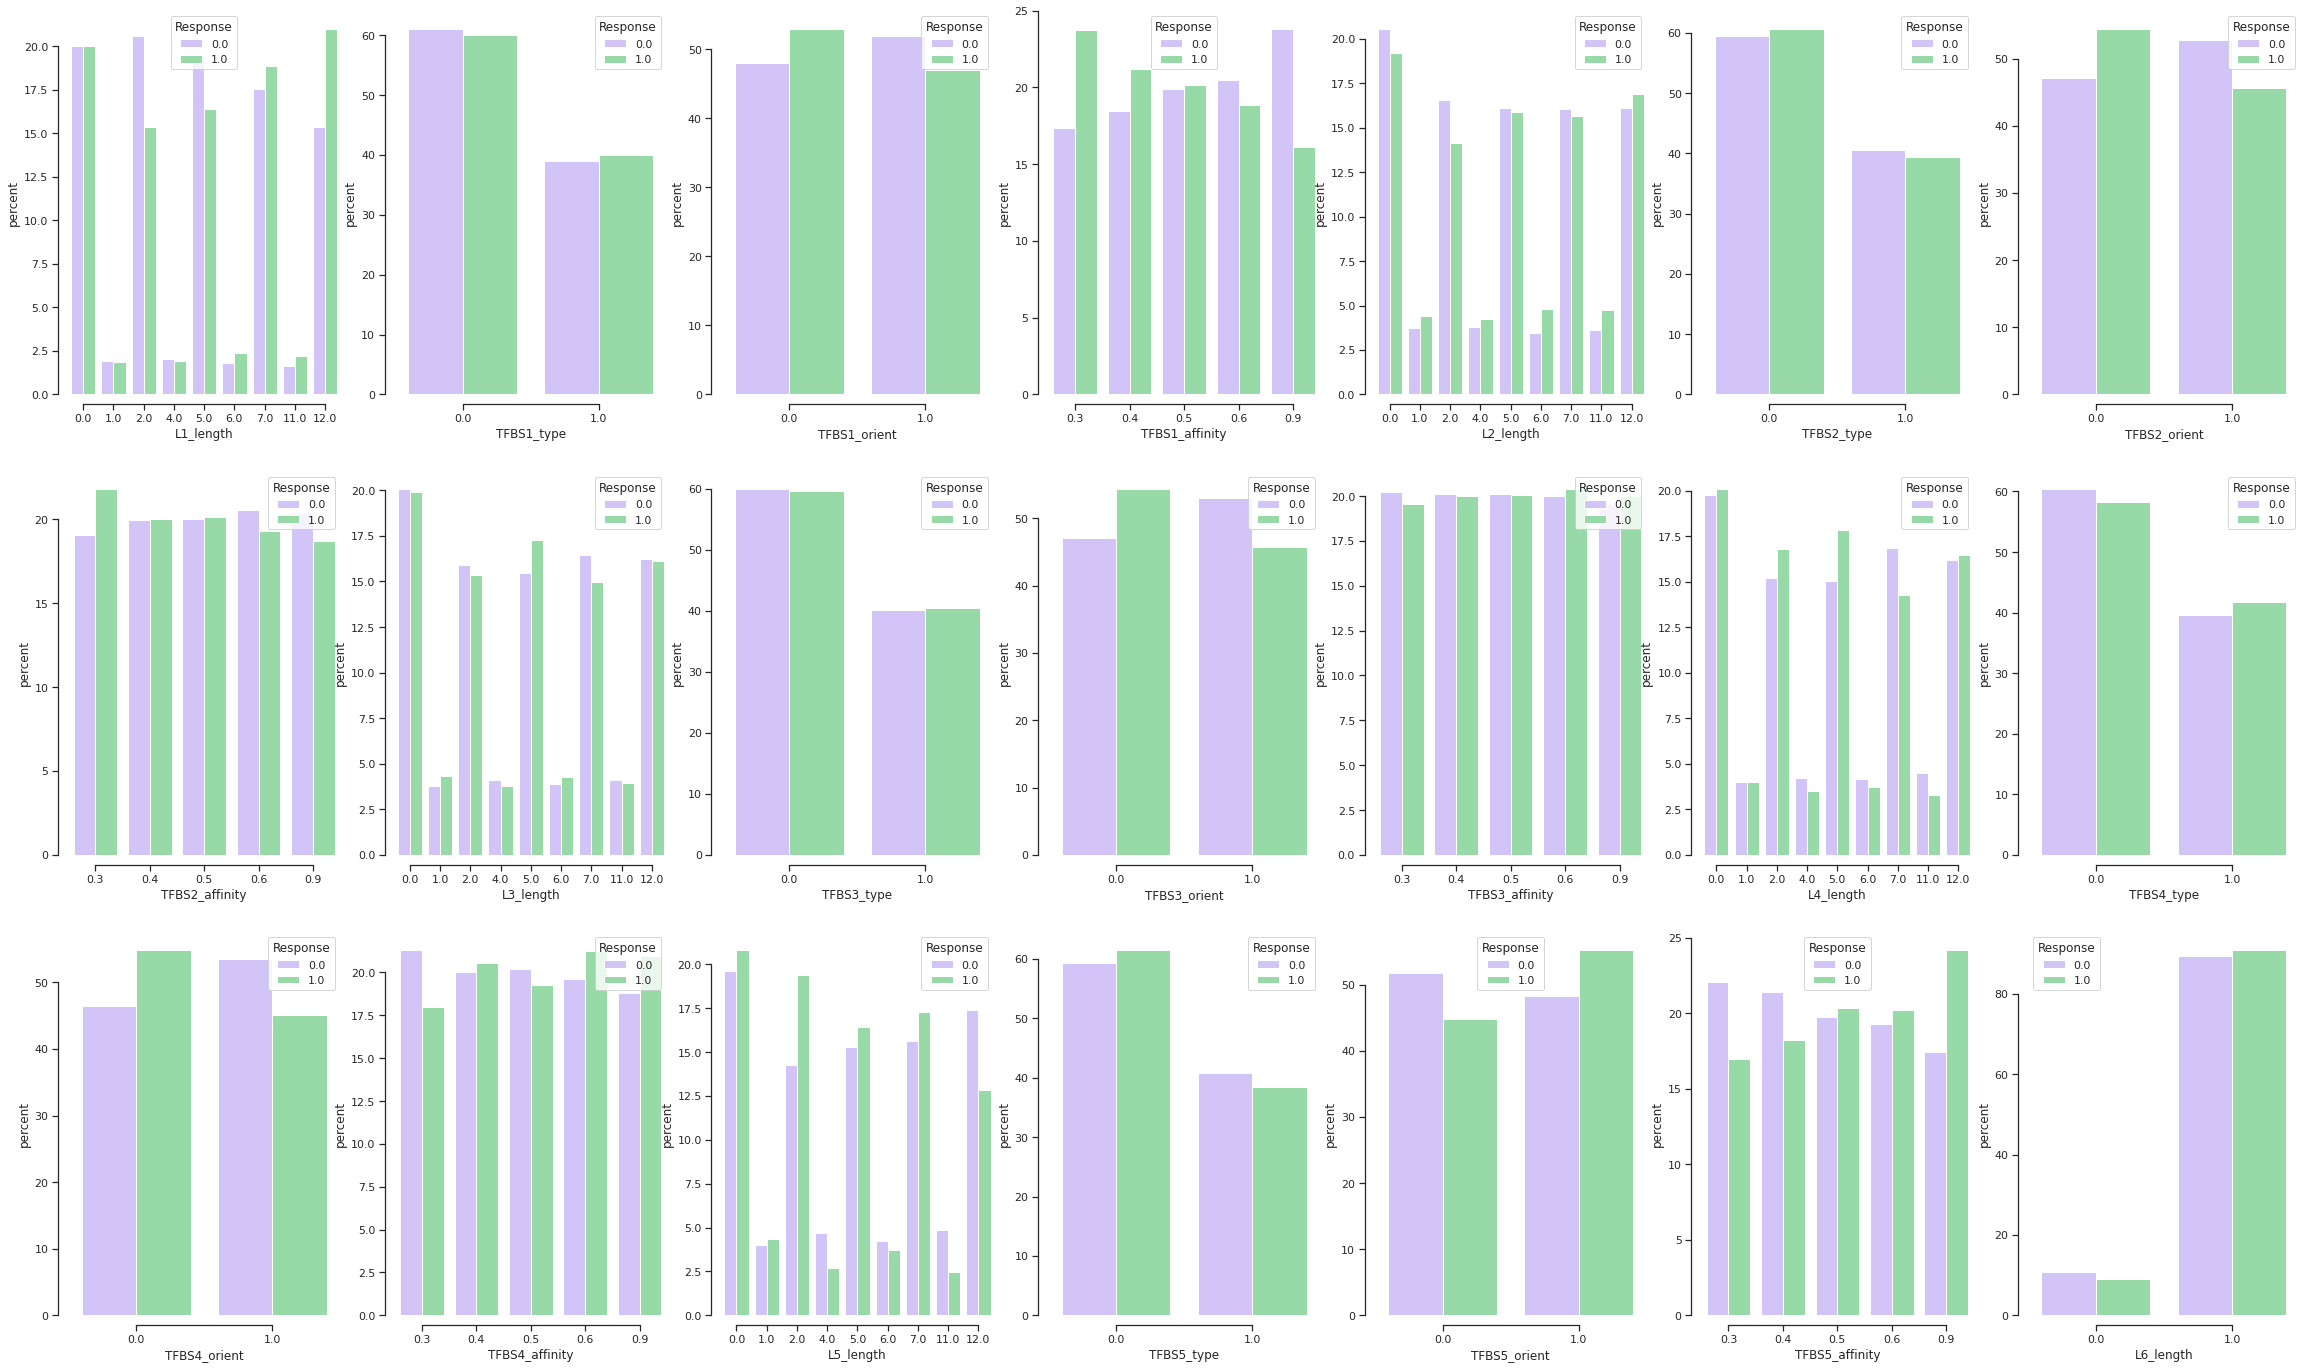

In [125]:
num_rows, num_cols = 3, 7

fig, ax = plt.subplots(num_rows, num_cols, figsize=(40,24))
sns.set_theme(style="ticks", palette="pastel")

for i, col in enumerate(df.columns[:-1]):

    data = df.groupby("Response")[col].value_counts(normalize=True)
    data = data.mul(100).rename('percent').reset_index()
    sns.barplot(data=data, x=col, y='percent',hue="Response", palette=["m", "g"], ax=ax[int(i/num_cols)][i%num_cols])
                                                                                               
sns.despine(offset=10, trim=True)                                                                                  

# Scratch
Place for old or testing code

# References